**Title: Bridging Eras: Analyzing Basketball Players**

Issue: This project focuses on unveiling the differences in preferred body types and comparing the statistical achievements of 
basketball players from the 1960s to the modern era, shedding light on the evolution of what features indicate peak 
basketball performance.

What Has Been Done: Rigorous data collection and statistical analysis methods have been employed to compare the performance 
metrics of players from two different eras of basketball.

Impact: This project not only enriches our appreciation of how the sport has evolved over time but also provides valuable insights 
for sports enthusiasts, analysts, and historians, enhancing our grasp of the game's dynamic history and player development.

Contact Information: Hammad Qazi, Phone: 780-655-0803, Email: hammadqazi75@gmail.com
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


**IMPORTANT DEFINITIONS AND ABBREVIATIONS:**

*PER* - Player Efficiency Rating: A rating of a player's per minute productivity which is crucial in determining a player's value.

*BMI* - Body Mass Index:  A person's weight in kilograms divided by the square of height in meters.

*3P:* The amount of three points a player made in a year.

*3PA:* The amount of three pointers a player attempted in a year.

*VORP* - Value Over Replacement Player: Quantifies a player's overall impact compared to a generic replacement-level player.

*OWS* - Offensive Win Shares: Points produced takes all facets of the offensive game into account: points scored, assists and offensive rebounds.

*DWS* - Defensive Win Shares: Quantifies a player's defensive contribution to team victories.

*G*- Games Played in a Season: The total amount of games in an NBA season is 82 and G is the amount of games played within a season.

*PTS* - Points: How many points total a player scored in a season.

*TRB* - Total Rebounds: How many rebounds a player got in a season.

*AST* - Total Assists: How many assists a player got in a season.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [75]:
#IMPORTING LIBRARIES AND SETTING NOTEBOOK OPTIONS
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import sklearn
import warnings
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.models import CrosshairTool, ColumnDataSource
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [76]:
# PREPROCESSING STEPS:

# Setting up and combining our two dataframe's in to for easy access. 
df1 = pd.read_csv('Datasets/Seasons_Stats.csv', index_col = 0)
df2 = pd.read_csv('Datasets/Players.csv', index_col = 0)
df3 = pd.merge(df1, df2, how = 'left') 
df3['BMI'] = df3['weight']/((df3['height'] / 100)**2) 

In [77]:
# Checking the datasets shape and searching for any missing values or duplicates. 
print("--------------------ORIGINAL UNFILTERED DATASET--------------------")
print(f'The number of rows in the dataset are: {df3.shape[0]}')
print(f'The number of columns in the dataset are: {df3.shape[1]}')
print(f'The number of duplicate entries in the dataset are: {df3.duplicated().sum()}')
print(f'The number missing values in the dataset are: {sum(df3.isna().sum())}')
print("-------------------------------------------------------------------")

--------------------ORIGINAL UNFILTERED DATASET--------------------
The number of rows in the dataset are: 24691
The number of columns in the dataset are: 59
The number of duplicate entries in the dataset are: 66
The number missing values in the dataset are: 160946
-------------------------------------------------------------------


##############################################################################################################################################################################################################
Though it's alarming we have so many duplicate entries and missing values these can likely be explained by the different eras these stats were collected from. This is because in the early era's of basketball, the three point shot didn't exist so stats such as 3P and 3PA etc all have blank values for those earlier years causing all those missing values. Additionally, some advanced stats such as VORP weren't recorded back then either. Furthermore, the duplicate entries likely aren't a problem because some stats just tend to overlap with other players and some players possibly could've scored the same amount of points in a season for example. Let's make two seperate dataframes, one for the modern era and, one for an early era in basketball which each share common stats so we can do a fair analysis. Then after we can observe changes to the our values.  
##############################################################################################################################################################################################################

In [78]:
# Making a seperate dataframe for the early era of basketball
nba_early_years = (df3[(df3["Year"] >= 1963) & (df3["Year"] <= 1973)]) 
nba_earlydf = nba_early_years[['Player', 
                                'Year',
                                'Age',
                                'G',
                                'PER',
                                'OWS',
                                'DWS',
                                'TRB',
                                'AST',
                                'PTS', 
                                'BMI',
                                'height',
                                'weight']].copy()

# Filter out ridiciously high/low PER's that aren't realisitc in a season where a player played a fair amount of games
nba_earlydf = nba_earlydf.drop(nba_earlydf[(nba_earlydf['PER']<= -5) | (nba_earlydf['PER'] >= 32.1)].index)
nba_earlydf = nba_earlydf.drop(nba_earlydf[(nba_earlydf['G'] < 10)].index) 

print("--------------------------1963-1973 DATASET------------------------")
print(f'The number of rows in the dataset are: {nba_earlydf.shape[0]}')
print(f'The number of columns in the dataset are: {nba_earlydf.shape[1]}')
print(f'The number of duplicate entries in the dataset are: {nba_earlydf.duplicated().sum()}')
print(f'The number missing values in the dataset are: {sum(nba_earlydf.isna().sum())}')
print("-------------------------------------------------------------------")

--------------------------1963-1973 DATASET------------------------
The number of rows in the dataset are: 1870
The number of columns in the dataset are: 13
The number of duplicate entries in the dataset are: 0
The number missing values in the dataset are: 0
-------------------------------------------------------------------


In [79]:
# Years 2007-2017 dataset
nba_modern_years = (df3[(df3["Year"] >= 2007) & (df3["Year"] <= 2017)])
nba_moderndf = nba_modern_years[['Player',
                                'Year',
                                'Age',
                                'G',
                                'PER',
                                'OWS',
                                'DWS',
                                'TRB',
                                'AST',
                                'PTS', 
                                'BMI',
                                'height',
                                'weight']].copy()

nba_moderndf = nba_moderndf.drop(nba_moderndf[(nba_moderndf['PER']<= -5) | (nba_moderndf['PER'] >= 32.1)].index)
nba_moderndf = nba_moderndf.drop(nba_moderndf[(nba_moderndf['G'] < 10)].index)

print("-------------------------2007-2017 DATASET-------------------------")
print(f'The number of rows in the dataset are: {nba_moderndf.shape[0]}')
print(f'The number of columns in the dataset are: {nba_moderndf.shape[1]}')
print(f'The number of duplicate entries in the dataset are: {nba_moderndf.duplicated().sum()}')
print(f'The number missing values in the dataset are: {sum(nba_moderndf.isna().sum())}')
print("-------------------------------------------------------------------")

-------------------------2007-2017 DATASET-------------------------
The number of rows in the dataset are: 5744
The number of columns in the dataset are: 13
The number of duplicate entries in the dataset are: 0
The number missing values in the dataset are: 0
-------------------------------------------------------------------


In [80]:
# Let's also make a spare df that combines these two dataframes for other visualization and analysis purposes.
combined_df = pd.merge(nba_earlydf, nba_moderndf, how = 'outer') # combining our filtered dataframes in to one.
print("--------------------------COMBINED DATASET-------------------------")
print(f'The number of rows in the dataset are: {combined_df.shape[0]}')
print(f'The number of columns in the dataset are: {combined_df.shape[1]}')
print(f'The number of duplicate entries in the dataset are: {combined_df.duplicated().sum()}')
print(f'The number missing values in the dataset are: {sum(combined_df.isna().sum())}')
print("-------------------------------------------------------------------")

--------------------------COMBINED DATASET-------------------------
The number of rows in the dataset are: 7614
The number of columns in the dataset are: 13
The number of duplicate entries in the dataset are: 0
The number missing values in the dataset are: 0
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Now that our datasets have been appropriately organized and labelled with minimal missing values and duplicates, we can now continue on and conduct a clean analysis with minimal error!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

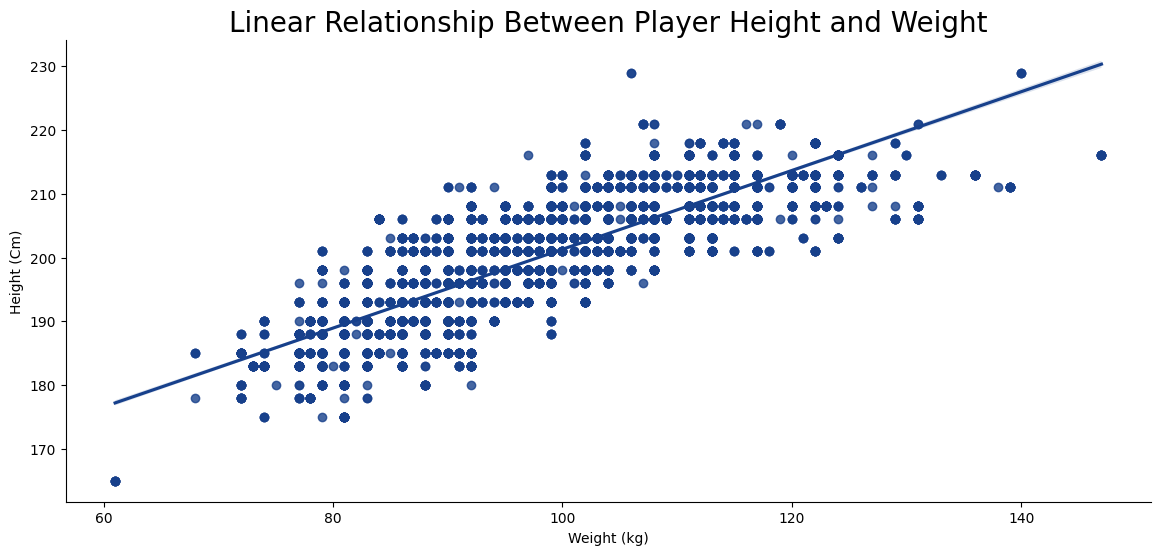

In [81]:
# Creating a line of best fit scatterplot for NBA player height and weight
plt.figure(figsize=(14, 6))

# Regplot allows us to create a scatterplot with a line through it
sns.regplot(x='weight', y='height', data=combined_df, color='#17408b')

plt.title('Linear Relationship Between Player Height and Weight', fontsize=20)
plt.ylabel('Height (Cm)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show() 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The visual above confirms that the height and weight of NBA players have a positive correalation.
Therefore since there is a very positive correalation between height and weight of players, we can use the BMI 
(a stat that uses both metrics) in calculations that would represent both categories in one. This will be useful for 
visualizations and analysis later down the line. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

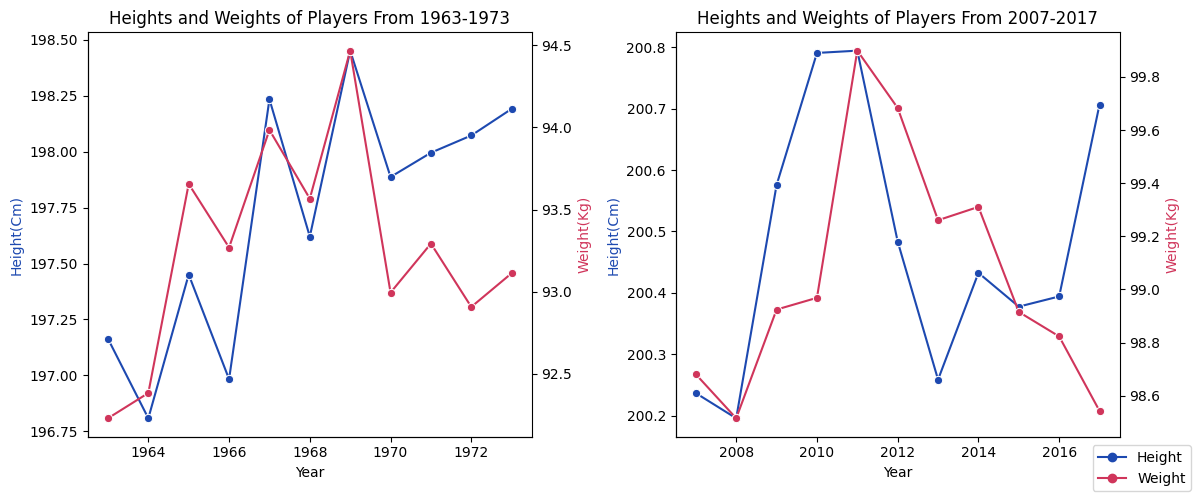

In [82]:
# Creating line graphs for the heights and weight's of NBA players in different era's
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot height on the left y-axis and weight on the right y-axis for 1963-1973
ax1 = sns.lineplot(data=nba_earlydf, x='Year', y='height', ax=axes[0], ci=None, label='', color='#1D49B0', marker='o')
ax2 = ax1.twinx()
sns.lineplot(data=nba_earlydf, x='Year', y='weight', ax=ax2, ci=None, label='', color='#D0355B', marker='o')
ax1.set_ylabel('Height(Cm)', color='#1D49B0')
ax2.set_ylabel('Weight(Kg)', color='#D0355B')
axes[0].set_title('Heights and Weights of Players From 1963-1973')
axes[0].set_xlabel('Year')

sns.despine(ax=axes[0])

# Plot height on the left y-axis and weight on the right y-axis for 2007-2017
ax3 = sns.lineplot(data=nba_moderndf, x='Year', y='height', ax=axes[1], ci=None, label='', color='#1D49B0', marker='o')
ax4 = ax3.twinx()
sns.lineplot(data=nba_moderndf, x='Year', y='weight', ax=ax4, ci=None, label='', color='#D0355B', marker='o')
ax3.set_ylabel('Height(Cm)', color='#1D49B0')
ax4.set_ylabel('Weight(Kg)', color='#D0355B')
axes[1].set_title('Heights and Weights of Players From 2007-2017')
axes[1].set_xlabel('Year')

sns.despine(ax=axes[1])

# Add legends with separate lines for height and weight
legend_labels = ['Height', 'Weight']
handles = [plt.Line2D([], [], color='#1D49B0', marker='o', label='Height'), 
           plt.Line2D([], [], color='#D0355B', marker='o', label='Weight')]

# Add custom legend
fig.legend(handles=handles, labels=legend_labels, loc='lower right')


plt.tight_layout()
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Comparing the average heights during the 60's era of basketball and our current day modern basketball, both have exhibited an uphill trend towards taller players. Please keep in mind however, that the average player today is taller from the average player back then due to a difference in scaling of the y-axis. Additionally, the players back then show a general trend of increaing body weight's while the player's today seem to have a trend of decreasing body weights. Similarly to height, please keep in mind that the average player of today is much heavier than the average player back then. A possible explanation is that players 
today could be slimming down their weight to increase speed and quickness in their movement.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Text(0.5, 1.0, 'Average BMI During the Modern Era of Basketball ')

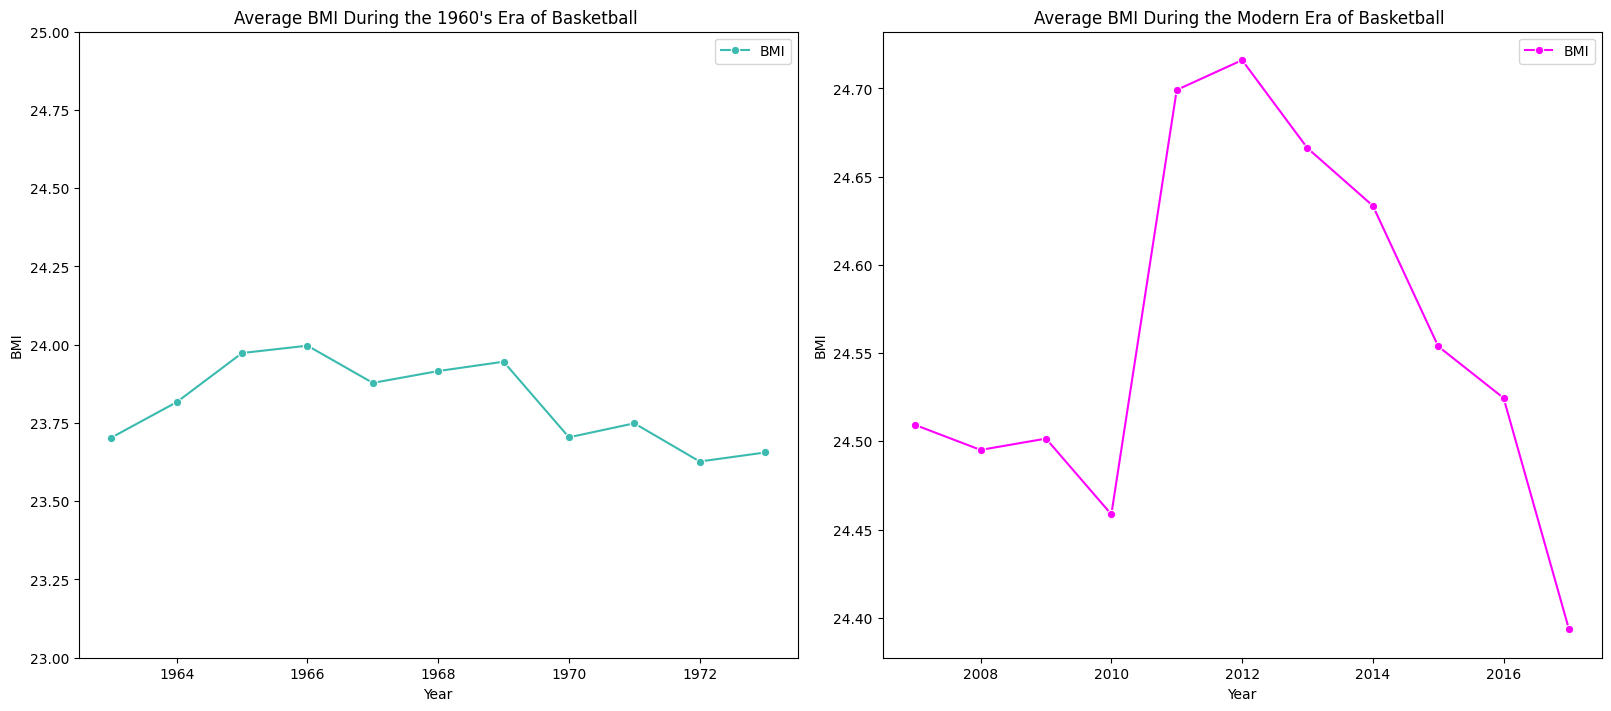

In [83]:
# Creating line graphs to show the progression of BMI throughout both era's
fig = plt.figure(figsize=(16,7), constrained_layout = True)
gridplt = fig.add_gridspec(nrows=1, ncols = 2)

# Average BMI for the legacy/early era
ax1 = fig.add_subplot(gridplt[0, 0:1])
lneplt1 = sns.lineplot(x=nba_earlydf['Year'], y='BMI', data=nba_earlydf, marker="o", ax=ax1, ci=None, label='BMI', color='#3BBAAF')
lneplt1.set_ylim(23,25)
lneplt1.set_title("Average BMI During the 1960's Era of Basketball ")
lneplt1.yaxis.set_label_text('BMI')

# Average BMI for the modern era
ax2 = fig.add_subplot(gridplt[0, 1:2])
lneplt2 = sns.lineplot(x=nba_moderndf['Year'], y='BMI', data=nba_moderndf, marker="o", ax=ax2, ci=None, label='BMI', color='#FF00FF')
lneplt1.set_ylim(23,25)
lneplt2.set_title("Average BMI During the Modern Era of Basketball ")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The BMI also supports the notion that today's player are slimming down due to a steady decrease in BMI since 2013 for NBA players. Meanwhile in the old era, BMI remained relatively the same with no drastic increase or decreases suggesting that player's still were unsure of what they wanted their ideal athletic form to be. However, please keep in mind that the average player today still possesses a higher BMI than a player of old.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

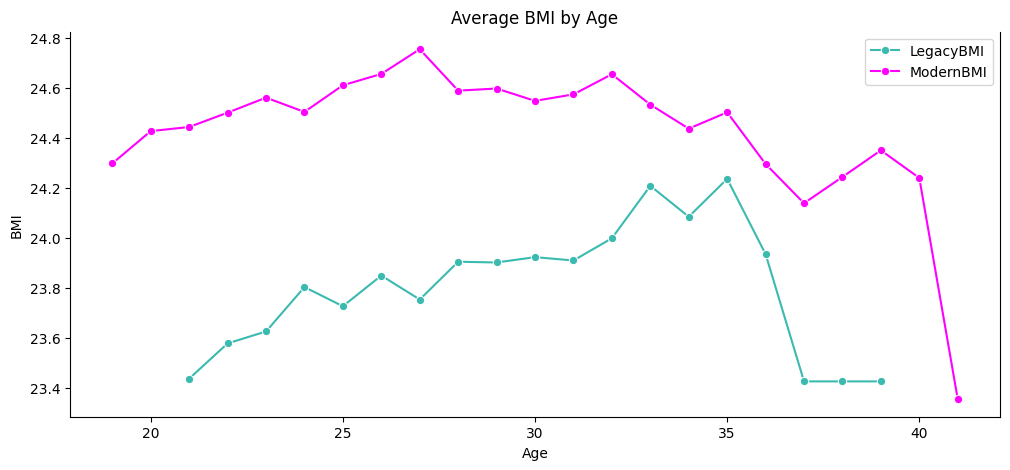

In [84]:
# Comparing BMI to age for both era's with line graphs
fig, ax = plt.subplots(figsize=(12, 5))

# Building our lineplots
sns.lineplot(x=nba_earlydf['Age'], y='BMI', data=nba_earlydf, marker="o", ax=ax, ci=None, label='LegacyBMI', color='#3BBAAF')
sns.lineplot(x=nba_moderndf['Age'], y='BMI', data=nba_moderndf, marker="o", ax=ax, ci=None, label='ModernBMI', color='#FF00FF')

plt.title('Average BMI by Age')
ax.xaxis.set_label_text('Age')
ax.set_ylabel('BMI')  # Setting the label for the y-axis

ax.spines['top'].set_visible(False)

plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
It is well known that in the modern NBA a player's peak performance or 'prime' is from the mid twenties to early thirties. Interestingly
in the modern era the highest BMI a player reaches in their career on average is the prime year age of 27 even though there's been
a trend of slimming down. Additionally, a modern player's BMI starts to heavily decline beginning at the age of 32 when player's begin to heavily 
fall off. An explanation for this phenomenon may be that as player's reach that prime stage of their career, they'd have likely put on a lot
more muscle which increases their BMI numbers. However, in the old era of basketball as player's aged past their prime years their BMI actually 
tended to increase. This may hint at legacy era player's may have had their prime at a later stage of their career. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Text(0, 0.5, 'PER')

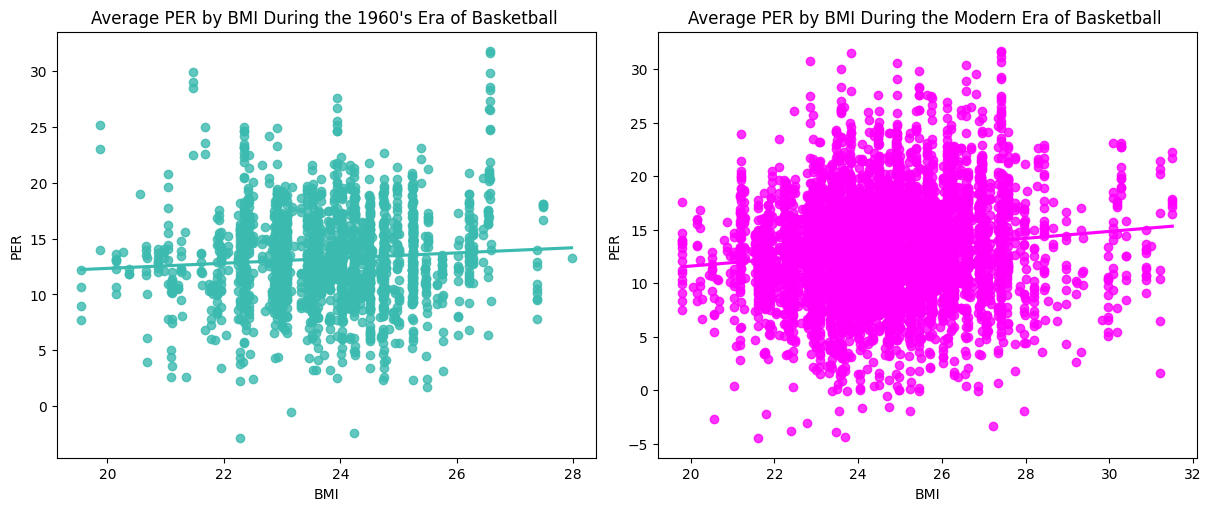

In [85]:
# # Creating a line of best fit scatterplot for NBA PER and BMI for both era's
fig = plt.figure(figsize=(12,5), constrained_layout = True)
gridplt = fig.add_gridspec(nrows=1, ncols = 2) # grid plot so we can display our graphs side by side

# lineplot for the legacy era
ax1 = fig.add_subplot(gridplt[0, 0:1])
lneplt1 = sns.regplot(x=nba_earlydf['BMI'], y='PER', data=nba_earlydf, marker="o", ax=ax1, ci=None, label='Height', color='#3BBAAF')
lneplt1.set_title("Average PER by BMI During the 1960's Era of Basketball ")
lneplt1.yaxis.set_label_text('PER')

# lineplot for the modern era
ax2 = fig.add_subplot(gridplt[0, 1:2])
lneplt2 = sns.regplot(x=nba_moderndf['BMI'], y='PER', data=nba_moderndf, marker="o", ax=ax2, ci=None, label='Height', color='#FF00FF')
lneplt2.set_title("Average PER by BMI During the Modern Era of Basketball ")
lneplt2.yaxis.set_label_text('PER')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The relationships in these graphs show a positive relationship between BMI and PER which at first glance may 
suggest that player's should attempt to be tall and pack on as much weight as possible. However, the increase in BMI
which leads to an increase in PER is likely due to more experienced NBA players having a higher BMI 
and more muscle which was established in our last visualization. Which is likely why our graphs are showing a trend 
in higher BMI's leading to better PER's. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

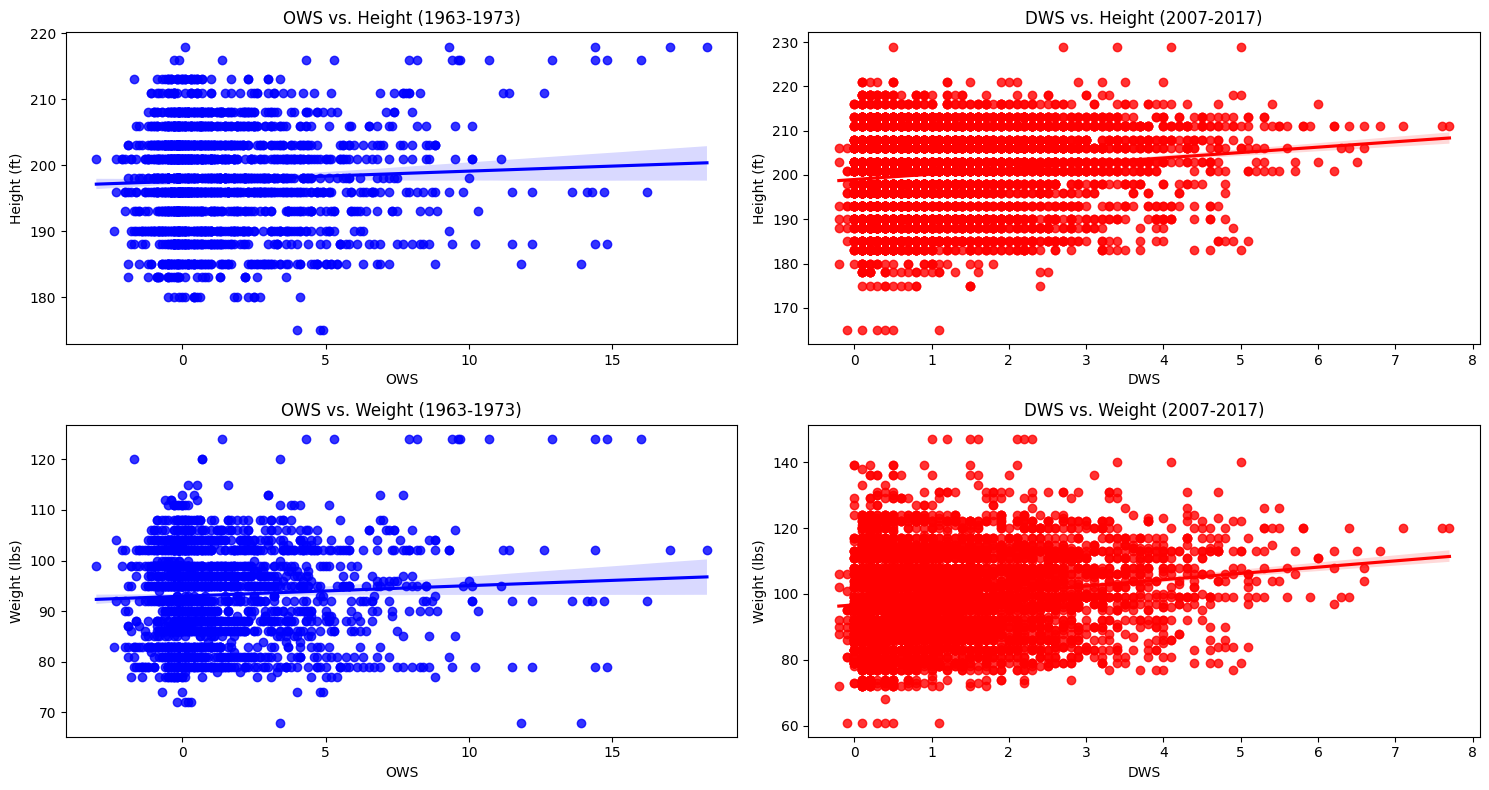

In [86]:
# Creating a line of best fit scatterplot for NBA player OWS and DWS based on height and weight for both era's
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plot OWS vs. Height for 1963-1973
sns.regplot(data=nba_earlydf, x='OWS', y='height', ax=axes[0, 0], label='', color='b')
axes[0, 0].set_title('OWS vs. Height (1963-1973)')
axes[0, 0].set_xlabel('OWS')
axes[0, 0].set_ylabel('Height (ft)')

# Plot DWS vs. Height for 2007-2017
sns.regplot(data=nba_moderndf, x='DWS', y='height', ax=axes[0, 1], label='', color='r')
axes[0, 1].set_title('DWS vs. Height (2007-2017)')
axes[0, 1].set_xlabel('DWS')
axes[0, 1].set_ylabel('Height (ft)')

# Plot OWS vs. Weight for 1963-1973
sns.regplot(data=nba_earlydf, x='OWS', y='weight', ax=axes[1, 0], label='', color='b')
axes[1, 0].set_title('OWS vs. Weight (1963-1973)')
axes[1, 0].set_xlabel('OWS')
axes[1, 0].set_ylabel('Weight (lbs)')

# Plot DWS vs. Weight for 2007-2017
sns.regplot(data=nba_moderndf, x='DWS', y='weight', ax=axes[1, 1], label='', color='r')
axes[1, 1].set_title('DWS vs. Weight (2007-2017)')
axes[1, 1].set_xlabel('DWS')
axes[1, 1].set_ylabel('Weight (lbs)')

plt.tight_layout()
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In these visualizations, we can see a positive correalation between OWS and DWS with height and weight in both era.
However, in the case of OWS, the correalation isn't that significant and likely be explained by that taller and heavier
players are those who are more experienced within the NBA. When it comes to DWS with height and weight though, these
relationships display a much more positive correaltion. This is likely due to taller and heavier player's being able
to pressure offense's more with their statures and pull down more rebounds on the defensive end; a good thing to 
keep in mind.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

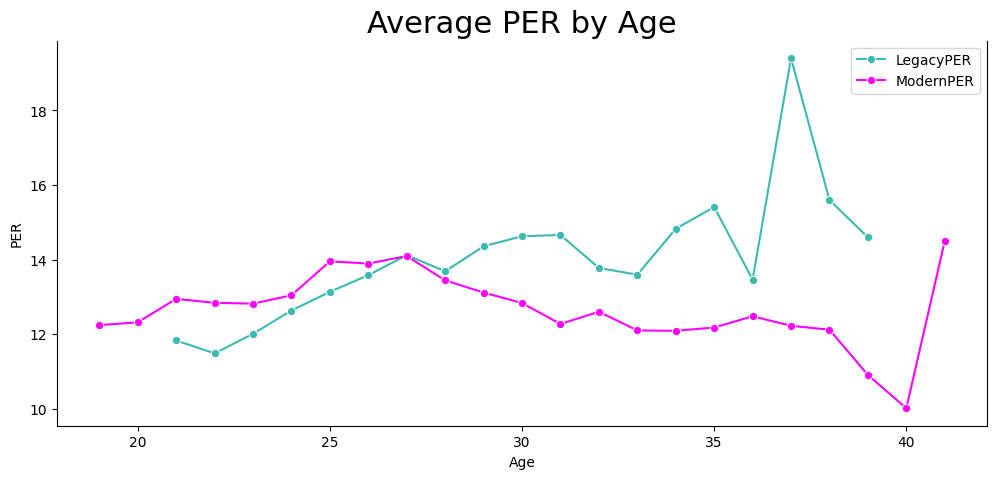

In [87]:
# Creating a line graph to compare PER and AGE for both era's
fig, ax = plt.subplots(figsize=(12, 5))

# Building our lines for both era's
sns.lineplot(x=nba_earlydf['Age'], y='PER', data=nba_earlydf, marker="o", ax=ax, ci=None, label='LegacyPER', color='#3BBAAF')
sns.lineplot(x=nba_moderndf['Age'], y='PER', data=nba_moderndf, marker="o", ax=ax, ci=None, label='ModernPER', color='#FF00FF')

plt.title('Average PER by Age', fontsize=22)
ax.xaxis.set_label_text('Age')
ax.yaxis.set_label_text('PER')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc=0)  # Using a single legend for both lines

ax.spines['top'].set_visible(False)

plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
As theorized before and confirmed with this visualization, in the modern era a player reaches their best PER
at 27 and steadily decreases after that age. In contrast, old era players PER's actually starts increasing after 
the age of 27 which suggests the old era player's prime is actually somewhere in the early to mid thirties.
Additionally, we can't factor in the spikes at 37 and 41 years old for legacy and modern player's PER's respectively
because most players are retired by their late thirties and these spikes are likely caused a few outliers.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

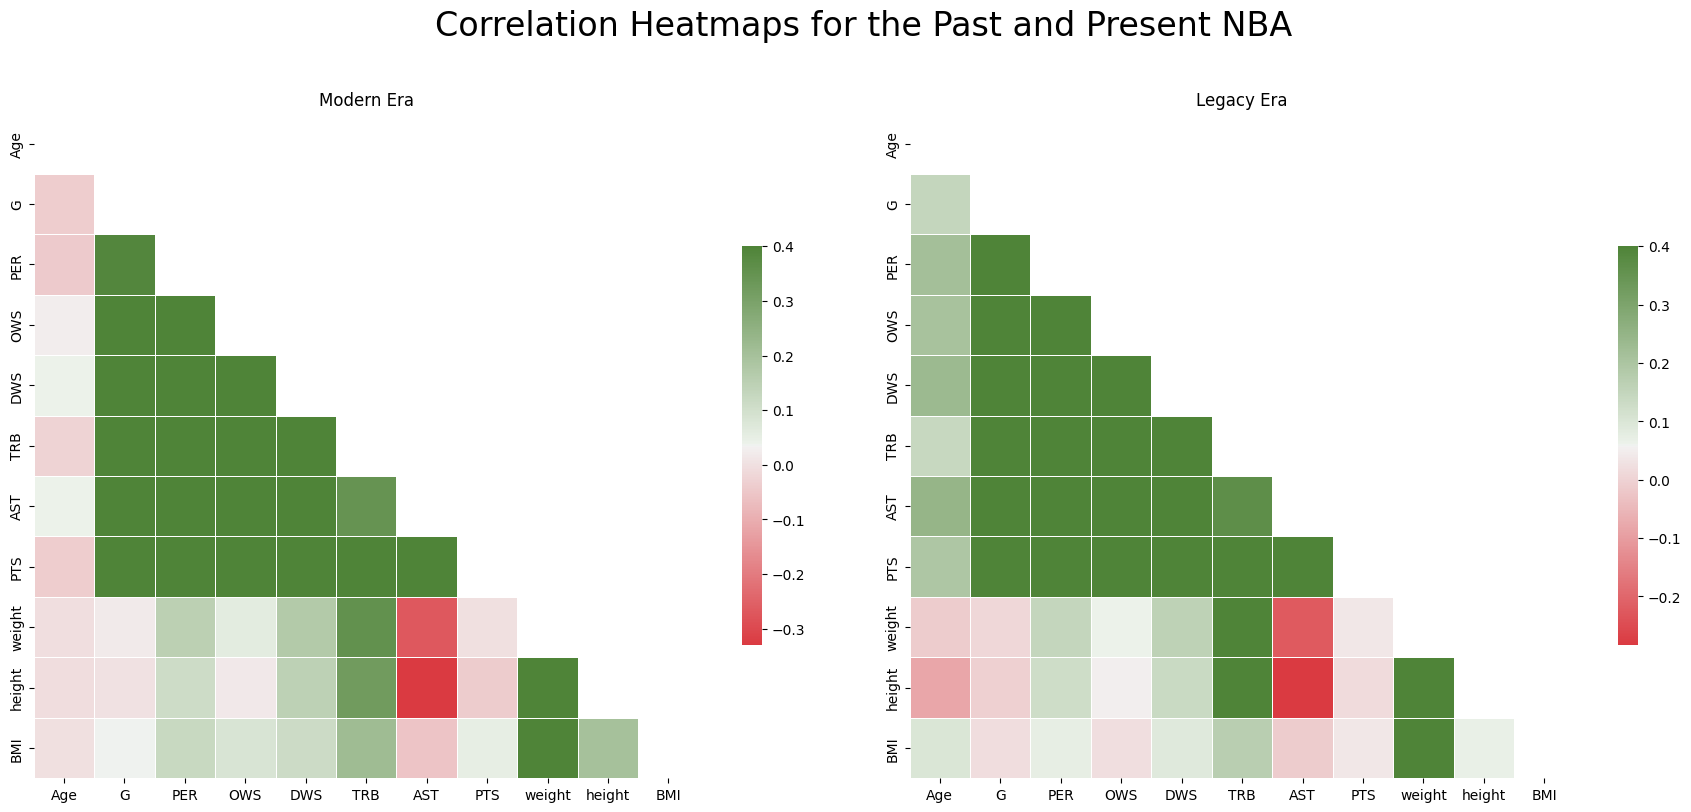

In [88]:
# Creating heat map graph's to compare all stats to each other for both era's
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Titles for the subplots
titles = ['Modern Era', 'Legacy Era']

# Iterate through the dataframes and titles
for i, df in enumerate([nba_moderndf, nba_earlydf]):
    df_corr = df[['Player', 'Age', 'G', 'PER', 'OWS', 'DWS', 'TRB', 'AST', 'PTS', 'weight', 'height', 'BMI']]
    
    # Compute the correlation matrix
    corr = df_corr.corr()
    
    # Generate a mask for the upper triangle
    tri_mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(11, 480, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=tri_mask, cmap=cmap, vmax=0.4,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.6}, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(titles[i])

# Set a common title for both subplots
plt.suptitle("Correlation Heatmaps for the Past and Present NBA", fontsize=24)


plt.tight_layout()
plt.subplots_adjust(top=0.85)


plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
With our combined heat map's we can draw a few valuable insights on the relationships of our stats with bodily characteristics.

1. A higher player weight and height tend to have a negative correalation with assists and positive
correalation with rebounds for both eras.

2. BMI seems to have a highly positive correalation with weight and a slightly less positive correalation
with height for both eras. This is likely because weight is weighted more heavily in the BMI formula. 

3. The insight that player height and weight correalate with one another is also supported by
this visualization. 

4. PER had a slightly positive correlation with height, weight and BMI for both eras which supports our past visualizations.

5. Age and PER in the modern era had a negative correlation while a positive one in the legacy era which further suggests that
players prime's in the legacy era were at later ages than today. 

6. DWS had slightly more positive correlation than OWS when it comes to weight and height in both eras. 

7. PER and BMI had a slightly positive correlation which supports that more experienced players with more muscle and 
body development are more efficient.

8. BMI and Age had a negative correlation in the modern age while it a positive correlation in the legacy age suggesting, 
that player's had older primes in the legacy era which supports our previous theories.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

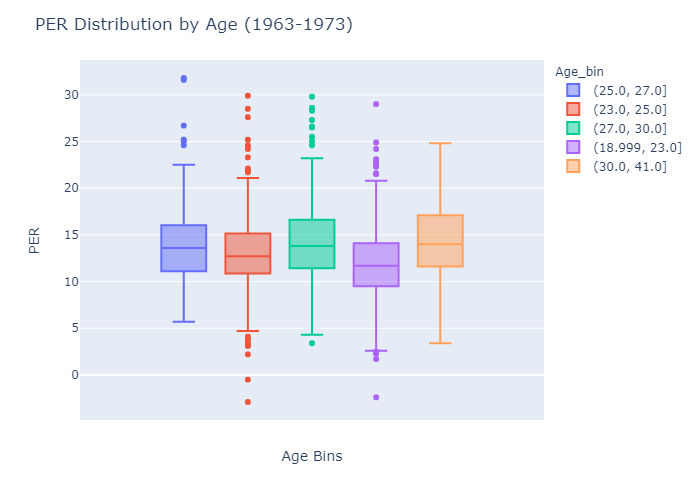

In [89]:
combined_df['Age_bin'] = pd.qcut(combined_df['Age'], q=5)

# Create the first box plot
fig = px.box(combined_df.query('Year >= 1963 & Year <= 1973'), y="PER", color="Age_bin")
fig.update_layout(
    title="PER Distribution by Age (1963-1973)",
    xaxis_title="Age Bins",
    yaxis_title="PER"
)

# Display the saved image in the notebook
fig.write_image("per_distribution_1963_1973.png")
Image("per_distribution_1963_1973.png")

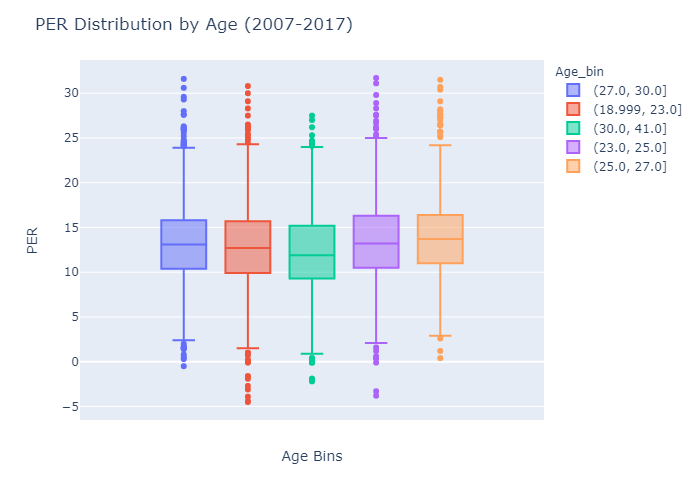

In [90]:
# Create the second box plot
fig2 = px.box(combined_df.query('Year >= 2007 & Year <= 2017'), y="PER", color="Age_bin")
fig2.update_layout(
    title="PER Distribution by Age (2007-2017)",
    xaxis_title="Age Bins",
    yaxis_title="PER"
)

fig2.write_image("per_distribution_2007_2017.png")
Image("per_distribution_2007_2017.png")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NOTES!: Please keep in mind that the colours between both graphs represent different age groups for each.
These boxplots confirm our theory that older players within the legacy era were more productive as the age group of 30-41 
years old was the most productive in the legacy era. Additionally, within the modern era the most productive age group was
25-27 also aligning with our predictions. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

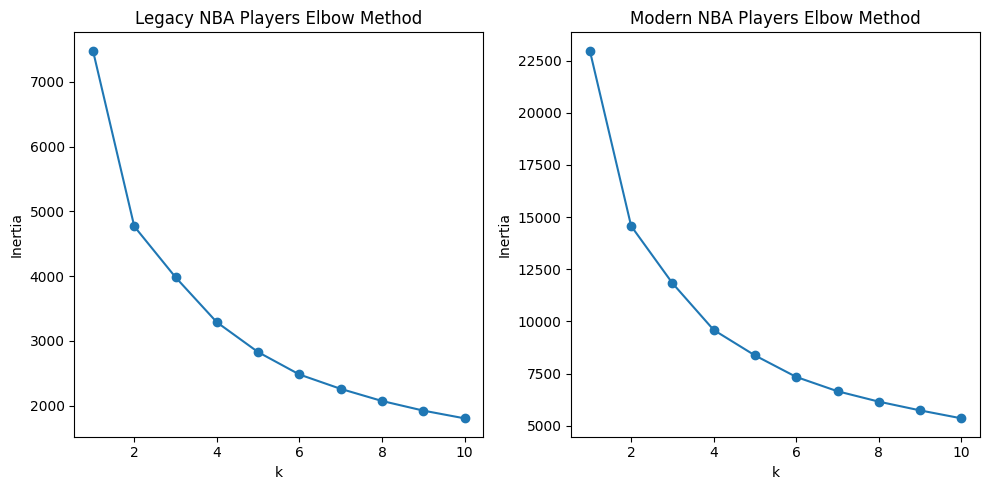

In [91]:
# Conudcting K-means clustering using the elbow method to group players together in to 'clusters'

# Set display option to 'diagram' for sklearn 
sklearn.set_config(display='diagram')

# Our column of interests are all our bodily characteristics
num_cols = ['Age', 'height', 'weight', 'BMI']

# Extract data for legacy and modern NBA players
legacy_cols = nba_earlydf[num_cols]
modern_cols = nba_moderndf[num_cols]

# Initialize KMeans models
kmeans_legacy = KMeans()
kmeans_modern = KMeans()

# Initialize a StandardScaler
scaler = StandardScaler()

# Create a preprocessor using make_column_transformer to scale numerical columns
preprocessor = make_column_transformer((scaler, num_cols))

# Create KMeans pipelines with preprocessor
kmeans_legacy = make_pipeline(preprocessor, KMeans(random_state=0))
kmeans_modern = make_pipeline(preprocessor, KMeans(random_state=0))

# Fit KMeans models to the respective datasets
kmeans_legacy.fit(nba_earlydf)
kmeans_modern.fit(nba_moderndf)

# Initialize lists to store inertias for different cluster counts
inertias_early = []
inertias_modern = []

# Set the figure width and height for plotting
figure_width = 500
figure_height = 500

# Define the range of cluster counts to explore
k_vals = range(1, 11)

# Calculate inertias for legacy NBA players
for k in k_vals:
    kmeans_legacy.set_params(kmeans__n_clusters=k)
    kmeans_legacy.fit(nba_earlydf)
    inertias_early.append(kmeans_legacy.named_steps['kmeans'].inertia_)

# Calculate inertias for modern NBA players
for k in k_vals:
    kmeans_modern.set_params(kmeans__n_clusters=k)
    kmeans_modern.fit(nba_moderndf)
    inertias_modern.append(kmeans_modern.named_steps['kmeans'].inertia_)

# Create Bokeh figures for displaying elbow plots
fig, (legacy_ax, modern_ax) = plt.subplots(1, 2, figsize=(10, 5))

# Plot legacy NBA Players Elbow Method
legacy_ax.plot(k_vals, inertias_early, marker='o')
legacy_ax.set_title('Legacy NBA Players Elbow Method')
legacy_ax.set_xlabel('k')
legacy_ax.set_ylabel('Inertia')

# Plot modern NBA Players Elbow Method
modern_ax.plot(k_vals, inertias_modern, marker='o')
modern_ax.set_title('Modern NBA Players Elbow Method')
modern_ax.set_xlabel('k')
modern_ax.set_ylabel('Inertia')

# Adjust layout and display
plt.tight_layout()
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
From the elbow method we can't see a clear big jump in inertias from anything past four cluster so
let's use the silhouette method instead to determine how many cluster we want group our players in.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [92]:
# Conudcting K-means clustering using the silhouette method to group players together 

# Transform the data using the preprocessor
legacy_process = preprocessor.fit_transform(nba_earlydf)
modern_process = preprocessor.fit_transform(nba_moderndf)

# Initialize lists to store silhouette scores for different cluster counts
legacy_scores = []
modern_scores = []

# Define a range of cluster counts to evaluate silhouette scores
k_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate silhouette scores for legacy NBA players
for k in k_vals:
    kmeans_legacy.set_params(kmeans__n_clusters=k)
    legacy_labels = kmeans_legacy.fit_predict(nba_earlydf)
    legacy_silhouette_coefs = silhouette_samples(legacy_process, legacy_labels)
    legacy_score = silhouette_score(legacy_process, legacy_labels)
    legacy_scores.append(legacy_score)

# Calculate silhouette scores for modern NBA players
for k in k_vals:
    kmeans_modern.set_params(kmeans__n_clusters=k)
    modern_labels = kmeans_modern.fit_predict(nba_moderndf)
    modern_silhouette_coefs = silhouette_samples(modern_process, modern_labels)
    modern_score = silhouette_score(modern_process, modern_labels)
    modern_scores.append(modern_score)


print("---------------------------------------------------------------------------------Legacy Era Silhouette Scores---------------------------------------------------------------------------------")
print(legacy_scores)
print("---------------------------------------------------------------------------------Modern Era Silhouette Scores---------------------------------------------------------------------------------")
print(modern_scores)

'''
Our silhouette scores likely didn't change too much because we have very homogeneous data which means our clusters are similar to each other
which makes sense because human bodies can only be so different to a certain extent. This means it is fine to use the max number of clusters
as our silhouette score remained relatively stable and we can also hope to acheive more clearly defined groups of players.
'''

# Define the number of clusters for the final KMeans models
num_clusters = 10

# Create KMeans models for both eras with the specified number of clusters
kmeans_legacy_final = KMeans(n_clusters=num_clusters, random_state=0)
nba_earlydf['Cluster'] = kmeans_legacy_final.fit_predict(nba_earlydf[['Age', 'BMI', 'height', 'weight', 'PTS', 'TRB', 'AST', 'PER']])
legacy_cluster_stats = nba_earlydf.groupby('Cluster').agg({
    'PER': 'mean',
    'height': 'mean',
    'weight':'mean',
    'BMI': 'mean',
    'Age': 'mean',
    'PTS': 'mean',
    'TRB': 'mean',
    'AST': 'mean',
    'OWS': 'mean',
    'DWS': 'mean',
    'G': 'mean'
}).reset_index()

kmeans_modern_final = KMeans(n_clusters=num_clusters, random_state=0)
nba_moderndf['Cluster'] = kmeans_modern_final.fit_predict(nba_moderndf[['Age', 'BMI', 'height', 'weight', 'PTS', 'TRB', 'AST', 'PER']])
modern_cluster_stats = nba_moderndf.groupby('Cluster').agg({
    'PER': 'mean',
    'height': 'mean',
    'weight':'mean',
    'BMI': 'mean',
    'Age': 'mean',
    'PTS': 'mean',
    'TRB': 'mean',
    'AST': 'mean',
    'OWS': 'mean',
    'DWS': 'mean',
    'G': 'mean'
}).reset_index()

# Create DataFrames to store cluster statistics for both eras
nba_legacy_dfscores = pd.DataFrame(legacy_cluster_stats)
nba_modern_dfscores = pd.DataFrame(modern_cluster_stats)

# Sort the DataFrames based on specified columns
legacy_sorted_df = nba_legacy_dfscores.sort_values(by=['PER', 'height', 'weight', 'BMI', 'Age', 'PTS', 'TRB', 'AST', 'OWS', 'DWS', 'G'])
modern_sorted_df = nba_modern_dfscores.sort_values(by=['PER', 'height', 'weight', 'BMI', 'Age', 'PTS', 'TRB', 'AST','OWS', 'DWS', 'G'])

# Print the sorted cluster statistics for both eras
print("                                       ")
print("--------------------------------------------------1963-1973 NBA Players Stats--------------------------------------------------")
print(legacy_sorted_df.to_string(index=False))
print("-----------------------------------------------------2007-2017 NBA Players-----------------------------------------------------")
print(modern_sorted_df.to_string(index=False))

---------------------------------------------------------------------------------Legacy Era Silhouette Scores---------------------------------------------------------------------------------
[0.3276214219800423, 0.2893132602019711, 0.2739626717394349, 0.2689110038728002, 0.26840353220904606, 0.26700169618064257, 0.2604076724819706, 0.25422491355768956, 0.25358407475324835]
---------------------------------------------------------------------------------Modern Era Silhouette Scores---------------------------------------------------------------------------------
[0.31779274717548817, 0.2768789190557113, 0.2751492460536348, 0.26377933307314094, 0.26765068703883227, 0.2621159890898997, 0.2574721458410021, 0.2588554609590799, 0.259693486173331]
                                       
--------------------------------------------------1963-1973 NBA Players Stats--------------------------------------------------
 Cluster       PER     height     weight       BMI       Age         PTS         T

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
**CONCLUSIONS DRAWN FROM ANALYSIS**:

- For both the modern and legacy era's no matter what height, weight or age you were
you had a bad PER if you were not able to play a lot of games within the season.
However it was interesting to note that heavier and taller players for both era's
were more likely to play less games in a season. Thus, it's reasonable to conclude 
that with more height and weight comes higher risk of injury. 

- 3 out of the top 4 top clusters in the legacy era on average had an older age 
in comparison to the other clusters which confirms our previous theories.

- 2 out of the top 4 top clusters in the legacy era had a higher on average BMI, height
and weight while the other two had a lower on average BMI, height and weight. This suggests two primary 
playstyles of players of one being small and shifty and the other being tall and dominant. 

- 3 out of the top 4 top clusters in the modern era had an average age of 26, suggesting
that around 26 is the prime age for players which confirms our previous theory.

- 3 out of the top 4 clusters in the modern era all had higher on average BMI's which
suggests that those with higher BMI's tend to be more efficient and by extension experienced players.

- All the top clusters in the modern age had very different height's and weight's which suggest's
that more playstyles have emerged during the modern era which is supported by all the different
height's and weight's the top players now have.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

**References:<br>**
Link: https://www.kaggle.com/datasets/drgilermo/nba-players-stats<br>
    Obtained the 'Players' and 'Seasons_Stats' CSV files.